# Imports

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Function Definitions

## Rotation Matrices

In [2]:
def xRot(theta):
    angle = math.radians(theta)
    mat = np.array([[1, 0, 0],
                   [0, math.cos(angle), math.sin(angle)],
                   [0, -math.sin(angle), math.cos(angle)]])
    return mat

In [3]:
def yRot(theta):
    angle = math.radians(theta)
    mat = np.array([[math.cos(angle), 0, -math.sin(angle)],
                   [0, 1, 0],
                   [math.sin(angle), 0, math.cos(angle)]])
    return mat

In [4]:
def zRot(theta):
    angle = math.radians(theta)
    mat = np.array([[math.cos(angle), math.sin(angle), 0],
                   [-math.sin(angle), math.cos(angle), 0],
                   [0, 0, 1]])
    return mat

## Leg Functions

In [5]:
def legPos(coax_angle, femur_angle, tibia_angle, body_model, leg_num):
    coax_rot = zRot(coax_angle)
    femur_rot = np.matmul(yRot(femur_angle), coax_rot)
    tibia_rot = np.matmul(yRot(tibia_angle), femur_rot)
    
    leg_coax = np.matmul(inv(coax_rot), np.array([[coax, 0, 0]]).T) + np.array([body_model[leg_num, :]]).T
    leg_femur = np.matmul(inv(femur_rot), np.array([[femur, 0, 0]]).T) + leg_coax
    leg_tibia = np.matmul(inv(tibia_rot), np.array([[0, 0, -tibia]]).T) + leg_femur
                       
    leg_model = np.concatenate((np.array([body_model[leg_num, :]]), leg_coax.T, leg_femur.T, leg_tibia.T), axis = 0)
    return leg_model

In [44]:
def legAngle(x, y, z):
    coax_angle = math.degrees(math.atan2(y, x));
    femur_angle = math.degrees(math.acos((tibia ** 2 - femur ** 2 - z ** 2 - (x - coax) ** 2) / (-2 * femur * (math.sqrt(z ** 2 + (x - coax) ** 2))))) - math.degrees(math.atan2(-z, (x - coax)))
    tibia_angle = 90 - math.degrees(math.acos((z ** 2 + (x - coax) ** 2 - femur ** 2 - tibia ** 2) / (-2 * femur * tibia)))
    
    if coax_angle <= 1e-10:
        coax_angle = 0;
        
    if femur_angle <= 1e-10:
        femur_angle = 0;
    
    if tibia_angle <= 1e-10:
        tibia_angle = 0;
    
    return [coax_angle, femur_angle, tibia_angle]

## Plot Model

In [6]:
def showModel():
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    # plotting
    ax.plot3D(body_model[:, 0], body_model[:, 1], body_model[:, 2], 'green');
    ax.plot3D(leg0_model[:, 0], leg0_model[:, 1], leg0_model[:, 2], 'blue');
    ax.plot3D(leg1_model[:, 0], leg1_model[:, 1], leg1_model[:, 2], 'blue');
    ax.plot3D(leg2_model[:, 0], leg2_model[:, 1], leg2_model[:, 2], 'blue');
    ax.plot3D(leg3_model[:, 0], leg3_model[:, 1], leg3_model[:, 2], 'blue');
    ax.plot3D(leg4_model[:, 0], leg4_model[:, 1], leg4_model[:, 2], 'blue');
    ax.plot3D(leg5_model[:, 0], leg5_model[:, 1], leg5_model[:, 2], 'blue');
    ax.set_xlim(-200, 200);
    ax.set_ylim(-200, 200);
    ax.set_zlim(-100, 100);

# Hexapod Measurments

In [7]:
body_offset = 85 #mm
coax = 26.34 #mm
femur = 76.2 #mm
tibia = 88.32 #mm

# Body Starting Position

In [8]:
body_model = np.array([[body_offset / 2, body_offset * math.sin(math.pi / 3), 0],
                      [body_offset, 0, 0],
                      [body_offset / 2, -body_offset * math.sin(math.pi / 3), 0],
                      [-body_offset / 2, -body_offset * math.sin(math.pi / 3), 0],
                      [-body_offset, 0, 0],
                      [-body_offset / 2, body_offset * math.sin(math.pi / 3), 0],
                      [body_offset / 2, body_offset * math.sin(math.pi / 3), 0]])

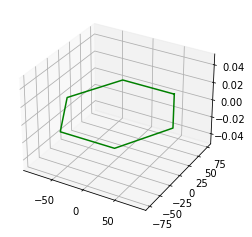

In [9]:
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection ='3d')
# plotting
ax.plot3D(body_model[:, 0], body_model[:, 1], body_model[:, 2], 'green');

# Leg Starting Positions

In [14]:
leg0_model = legPos(60, 0, 0, body_model, 0) #coax angle, femur angle, tibia angle, model of the hexapod body, leg number
leg1_model = legPos(0, 0, 0, body_model, 1)
leg2_model = legPos(-60, 0, 0, body_model, 2)
leg3_model = legPos(-120, 0, 0, body_model, 3)
leg4_model = legPos(180, 0, 0, body_model, 4)
leg5_model = legPos(120, 0, 0, body_model, 5)

In [15]:
%matplotlib qt

showModel()

In [45]:
legAngle(coax + femur, 0, -tibia)

[0, 0, 0]